# Introduction and Dataset Statistics


## Exploratory Data Analysis of Indian Cars Dataset

In this notebook, we perform an exploratory data analysis (EDA) on a dataset containing information about various cars in India. The dataset includes details such as make, model, variant, body type, fuel type, and more. Let's start by exploring some basic statistics about the dataset.



In [1]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [2]:
df = pd.read_csv('/kaggle/input/indian-cars-dataset/cars_ds_final_2021.csv')

In [3]:
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
58,58,Tata,Tiago,Revotron Xz Plus Dual Tone,"Rs. 6,10,000",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,35 litres,Petrol,1535 mm,3746 mm,1647 mm,Hatchback,5.0,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,715,Tata,Altroz,Xz Diesel,"Rs. 9,04,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,37 litres,Diesel,1523 mm,3990 mm,1755 mm,Hatchback,5.0,...,Yes,Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,1.5L Turbocharged Revotorq (BS VI),NaN,Yes,NaN,NaN,NaN,NaN,NaN
860,860,Kia,Seltos,Gtk 1.4,"Rs. 13,79,000",1353 cc,4.0,NaN,FWD (Front Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,50 litres,Petrol,1645 mm,4315 mm,1800 mm,SUV,5.0,...,NaN,NaN,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,163,Maruti Suzuki,Dzire,Zxi Plus Amt,"Rs. 8,68,613",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,37 litres,Petrol,1515 mm,3995 mm,1735 mm,Sedan,4.0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,641,Maruti Suzuki,Alto,Lxi Cng (Cng +,"Rs. 4,05,570",796 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,35 litres,CNG + Petrol,1475 mm,3445 mm,1490 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,Renault,Kwid,Rxl 0.8,"Rs. 3,83,290",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,28 litres,Petrol,1490 mm,3731 mm,1579 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,902,Volkswagen,Passat,2.0 Tdi Highline,"Rs. 33,21,500",1968 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,66 litres,Diesel,1456 mm,4767 mm,1832 mm,Sedan,4.0,...,Cup Holders,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
827,827,Honda,Wr-V,Exclusive Edition Petrol,"Rs. 9,35,050",1199 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Petrol,1601 mm,3999 mm,1734 mm,SUV,5.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# Basic Dataset Statistics Visualization


- Total Observations: {l_D}
- Unique Car Makers: {c_m}
- Unique Car Models: {c_c}
- Number of Features: {n_f}

Let's visualize these statistics with a bar chart.


In [4]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

# Data Cleaning and Feature Engineering


We start by loading the dataset and performing some initial data cleaning and feature engineering steps. These include handling missing values, converting data types, and creating a new 'car' column by combining 'Make' and 'Model'.

In [5]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

# Price Distribution Histogram



We examine the distribution of car prices in the dataset through a histogram. The data is visualized both on a linear and logarithmic scale to provide a comprehensive view of the price distribution.

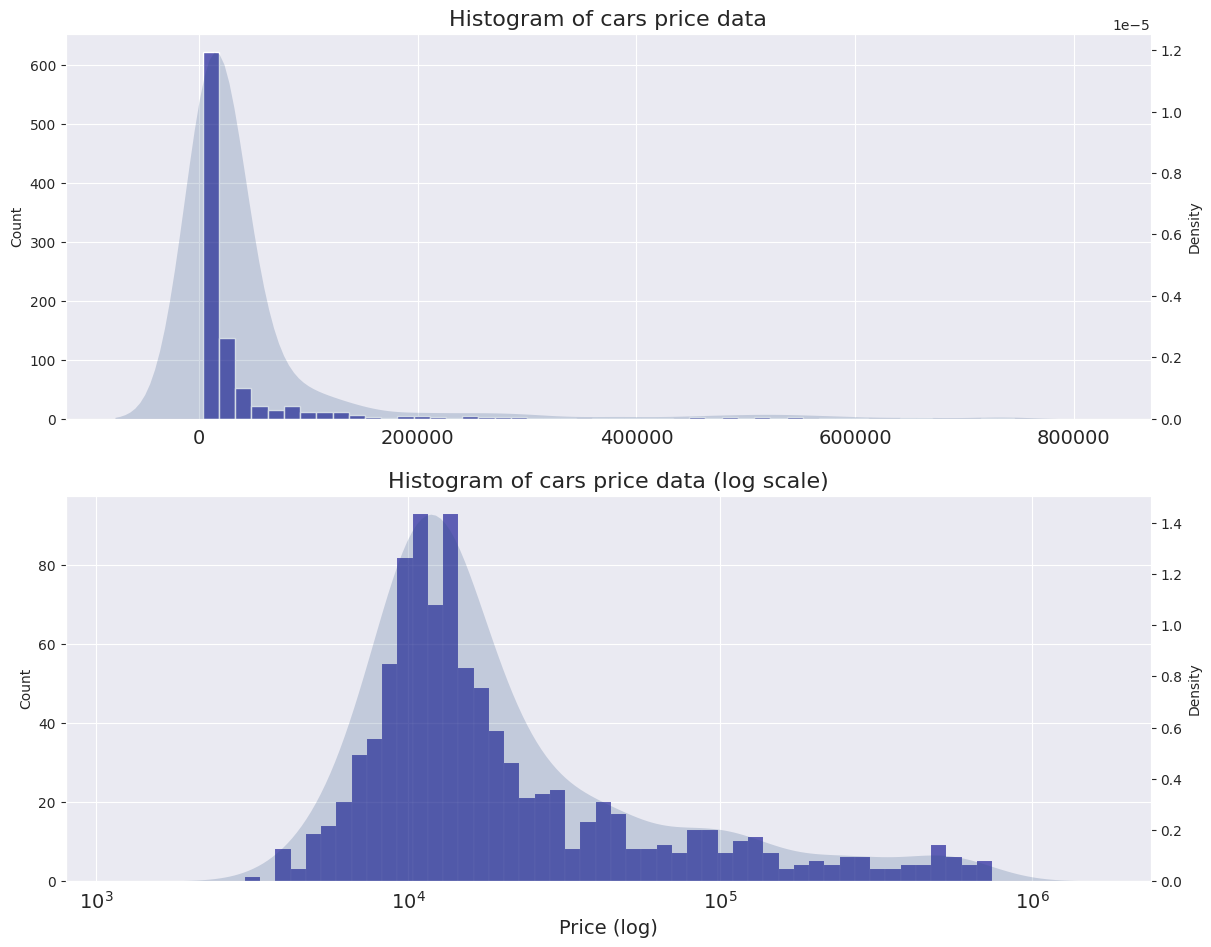

In [6]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

# Price Distribution Box Plot by Fuel Type



We analyze the box plot of car prices, categorized by fuel type, to understand the price distribution within different fuel categories.


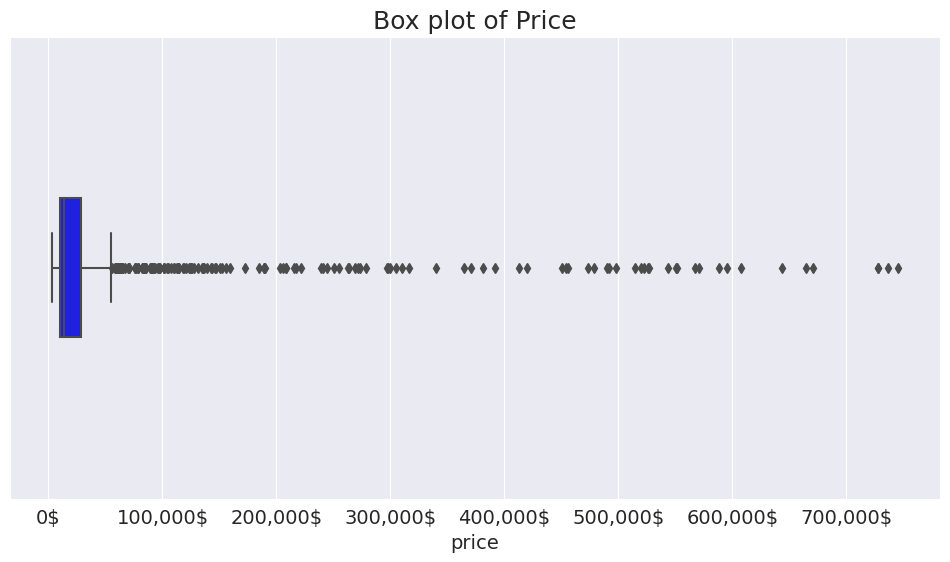

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

# Body Type Distribution Analysis



We explore the distribution of cars based on their body types through a count plot. Additionally, a box plot is presented to visualize the price distribution for each body type.

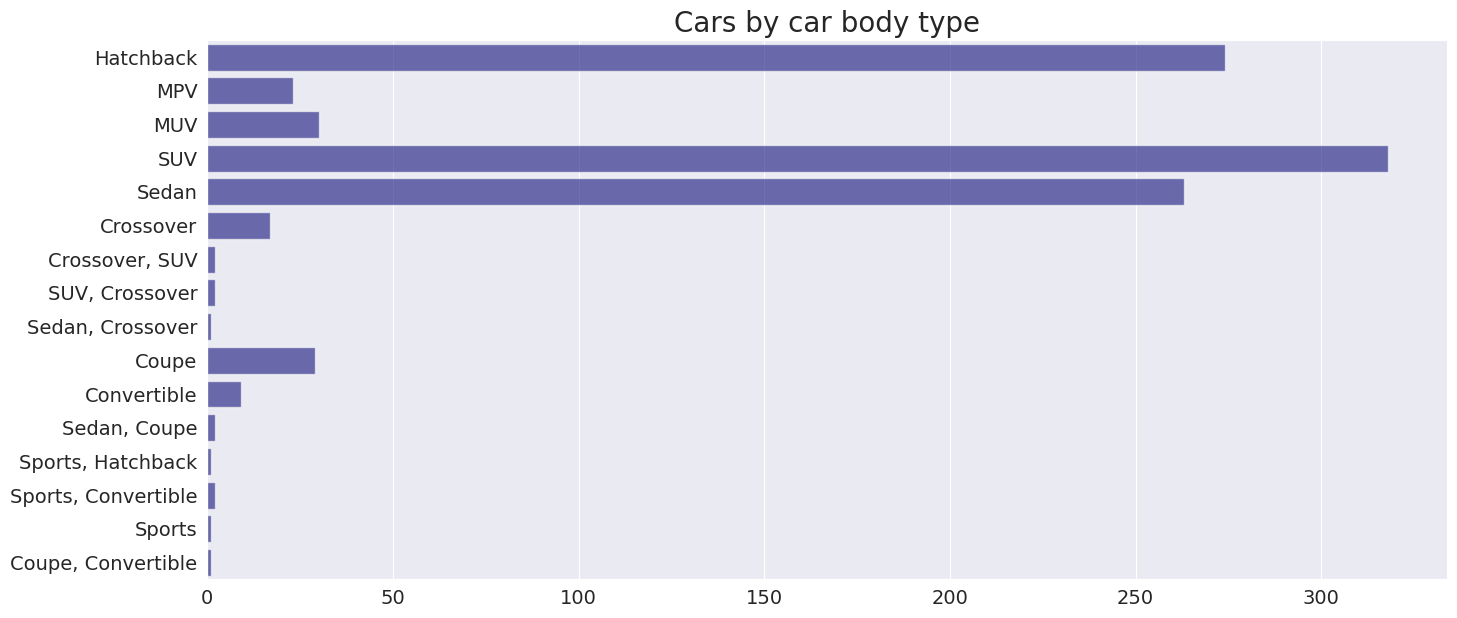

In [8]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

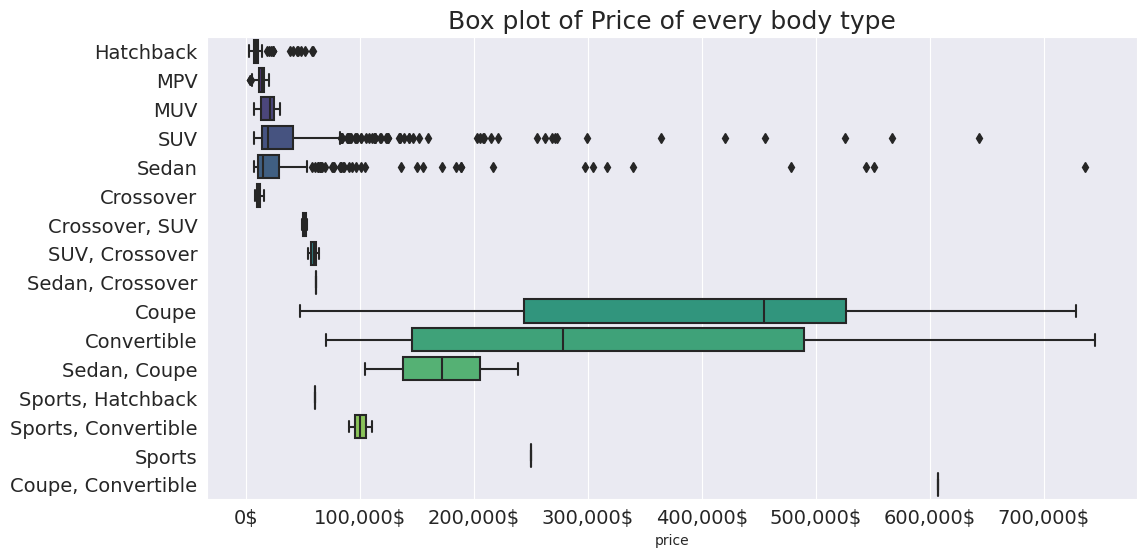

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

# Fuel Type Distribution Analysis


A count plot is used to illustrate the distribution of cars based on their engine fuel types. This provides insights into the prevalence of different fuel options in the dataset.

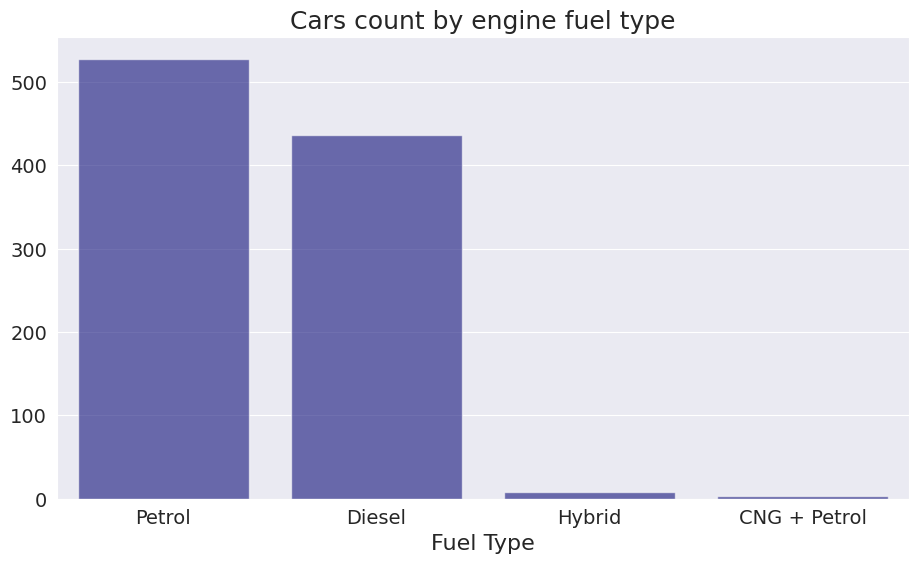

In [10]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

#  Power vs. Price Scatter Plot



We investigate the relationship between car power and price by creating a scatter plot. The points are colored based on the car's body type, providing additional insights into how power influences car prices.

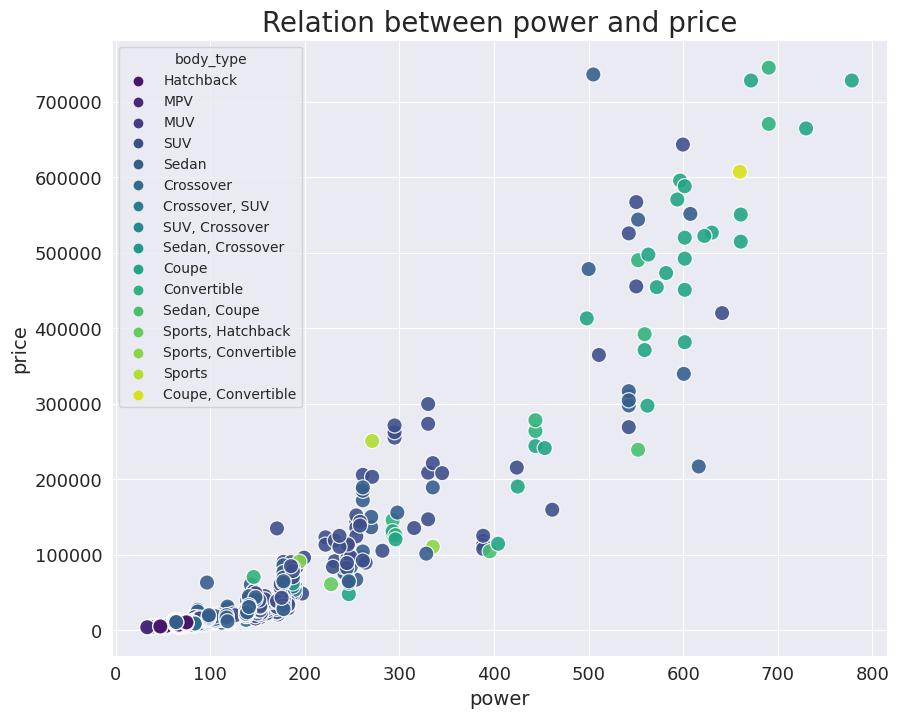

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

#  Mileage vs. Price Regression Plot



A joint plot with regression analysis is used to explore the relationship between car mileage and price. This analysis provides insights into how mileage impacts car pricing.

<Figure size 1000x800 with 0 Axes>

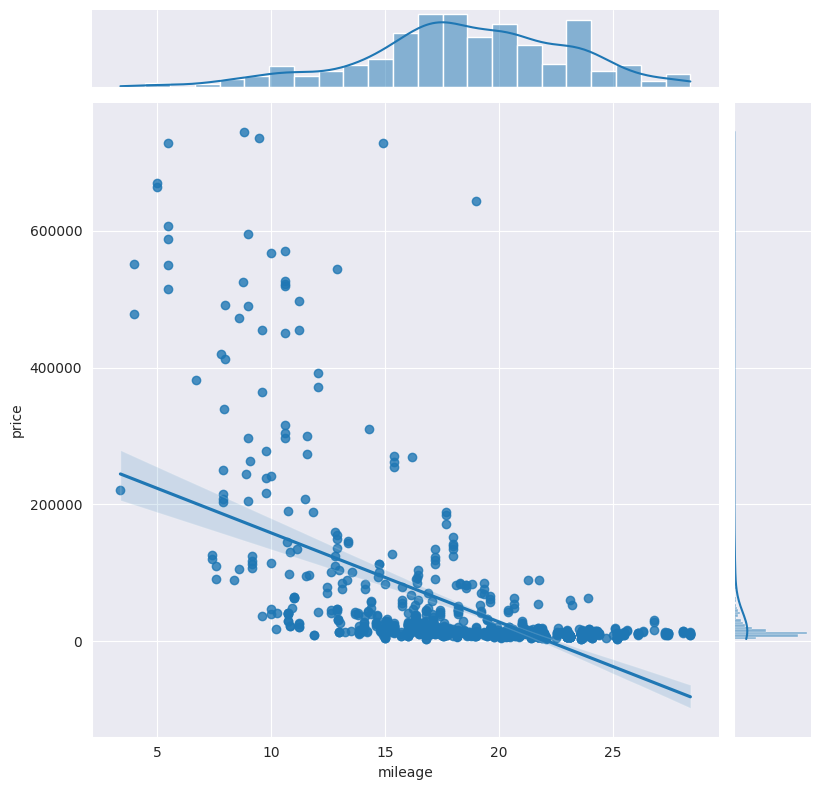

In [12]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

# Correlation Matrix Heatmap



A heatmap of the correlation matrix is presented to visualize the relationships between numerical variables. This helps us understand how different features correlate with each other, offering insights into potential patterns within the dataset.

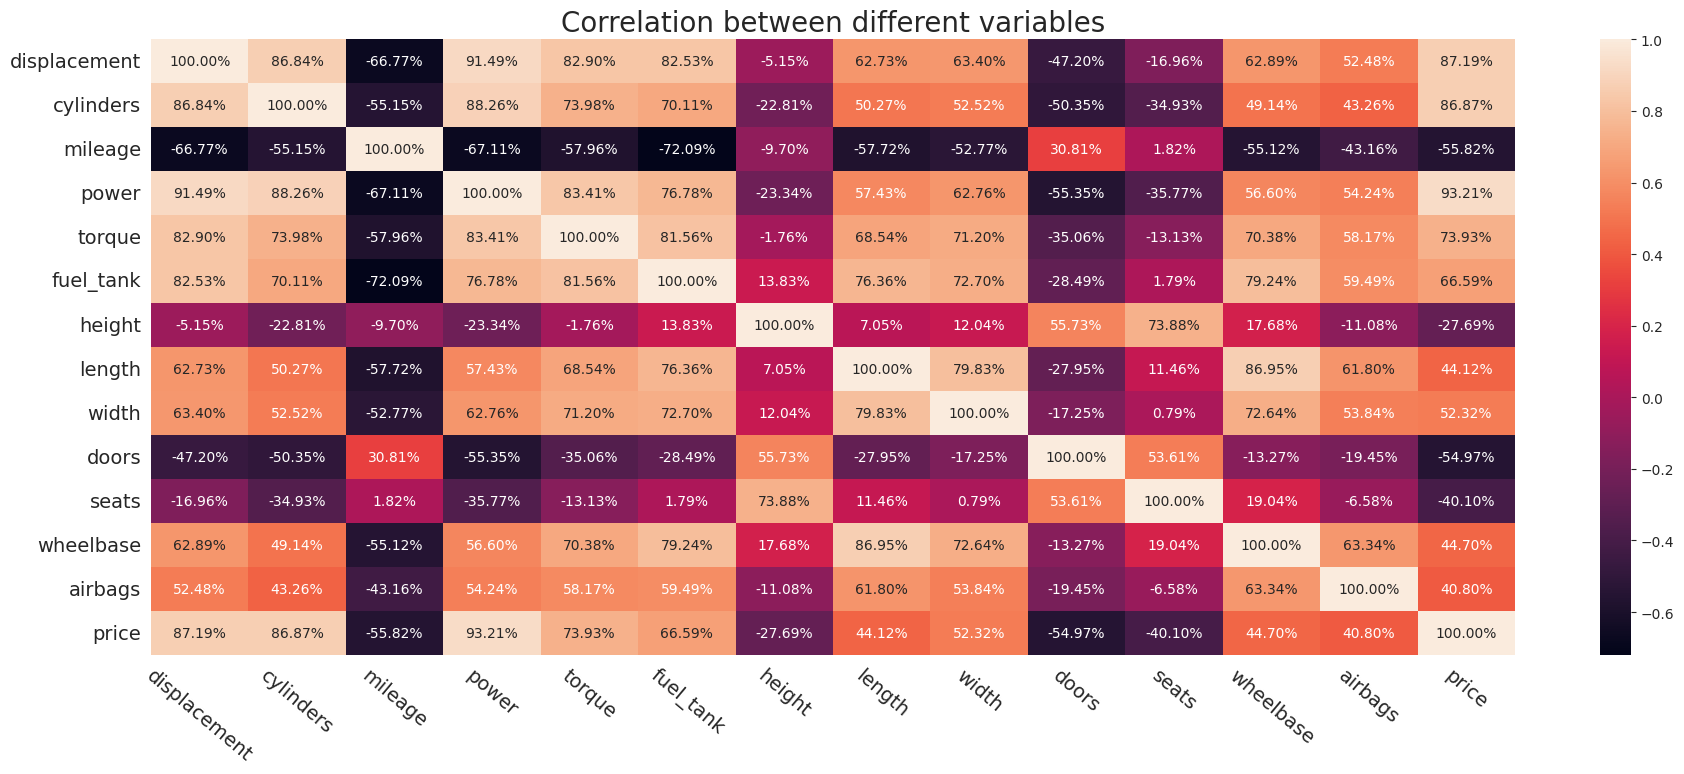

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2%')
plt.title('Correlation between different variables', fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14)

plt.show()


# Pair Plot and 3D Scatter Plot

### Multivariate Analysis

A pair plot and a 3D scatter plot are created to perform multivariate analysis, exploring the relationships between displacement, mileage, power, and price. The points in the 3D scatter plot are colored based on the car's make, providing a detailed perspective on the dataset.

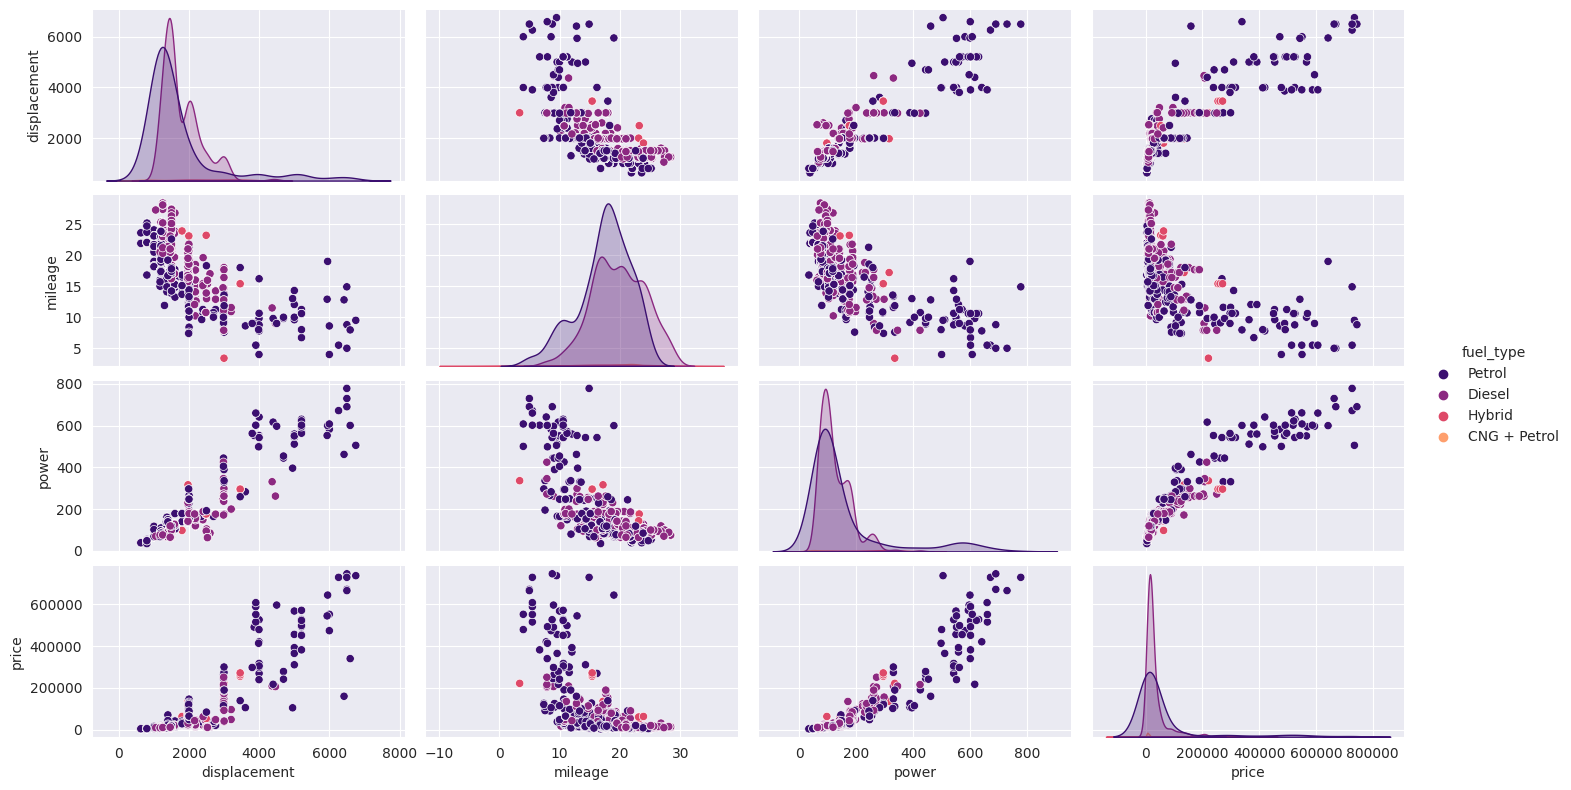

In [15]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [17]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

## Inferences and Conclusions

1. **Price Distribution Analysis:**
   - The histogram and box plot of car prices reveal a wide range of prices, with a majority of cars priced below $100,000. The logarithmic scale highlights the concentration of cars in lower price brackets.

2. **Fuel Type Impact on Price:**
   - The box plot categorized by fuel type suggests that electric cars generally have higher prices, while diesel and petrol cars exhibit a broader price range. This indicates that fuel type plays a significant role in determining car prices.

3. **Car Body Type Insights:**
   - The count plot and corresponding box plot for body types provide insights into the distribution of cars. Sedans and SUVs are the most prevalent body types, with SUVs generally having higher price ranges compared to other body types.

4. **Engine Fuel Type Distribution:**
   - The count plot illustrates that petrol-powered cars dominate the dataset, followed by diesel and electric cars. This reflects the current market trends in India, where petrol cars are more common.

5. **Power vs. Price Relationship:**
   - The scatter plot reveals a positive correlation between car power and price, indicating that more powerful cars tend to have higher prices. This aligns with the general expectation that increased power often corresponds to a higher price tag.

6. **Mileage vs. Price Relationship:**
   - The joint plot with regression analysis demonstrates a negative correlation between car mileage and price. Cars with better mileage tend to have lower prices, suggesting that fuel efficiency is a crucial factor influencing pricing decisions.

7. **Correlation Analysis:**
   - The correlation matrix heatmap highlights strong positive correlations between displacement, power, and price. This implies that larger engine displacements and higher power ratings contribute to higher car prices.

8. **Multivariate Analysis:**
   - The pair plot and 3D scatter plot provide a comprehensive view of the relationships between displacement, mileage, power, and price. It reinforces the earlier observations, emphasizing the interplay of these variables in determining car prices.

In conclusion, this exploratory data analysis offers valuable insights into the factors influencing car prices in the Indian market. The relationships between variables such as fuel type, body type, power, and mileage provide a nuanced understanding of the market dynamics, which can be beneficial for both consumers and industry stakeholders.
